<a href="https://colab.research.google.com/github/Eunjung-Cho/python_study/blob/master/API/%EA%B5%AC%EA%B8%80%ED%8A%B8%EB%A0%8C%EB%93%9C_%EC%8B%A4%ED%97%981.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# pytrend 라이브러리로 실험

- 공식문서: https://pypi.org/project/pytrends/


## 필요한 라이브러리

In [ ]:
pip install pytrends

In [ ]:
pip install iso3166

In [ ]:
import pandas as pd
from pytrends.request import TrendReq
import datetime
from iso3166 import countries
pytrend = TrendReq()

In [ ]:
pytrend.build_payload(kw_list=['Taylor Swift'])
# 국가별 관심
df = pytrend.interest_by_region()
df.head(100)

,Taylor Swift
geoName,
Afghanistan,0
Albania,0
Algeria,0
American Samoa,0
Andorra,0
...,...
Guyana,0
Haiti,0
Heard & McDonald Islands,0


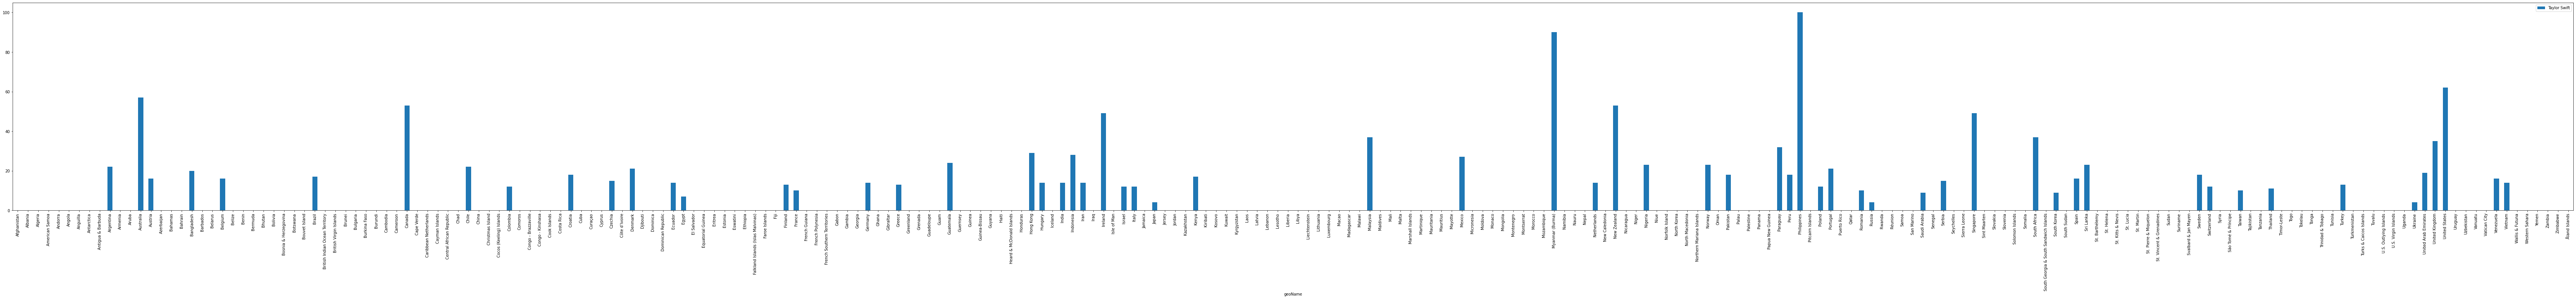

In [ ]:
df.reset_index().plot(x='geoName', y='Taylor Swift', figsize=(120,10), kind = 'bar')

## 국가별 데이터 추출

In [ ]:
def intrest_processing(geo, country_name):
  pytrend.build_payload(kw_list = keyword, timeframe = timerange, geo = geo, cat =3)
  dt = pytrend.interest_over_time()
  try:
    # 필요없는 컬럼 지우기
    del dt['isPartial']
    # 열 이름 다시 짓기
    dt.rename(columns = {'korea':country_name}, inplace = True)
    return dt
  except:
    pass

keyword = ["KOREA"]


#날짜 설정하기
today = datetime.datetime.now()
startdate = '2021-01-01'
enddate = str(today.date())
timerange = startdate + ''+ enddate

#토탈 데이터
result = pd.DataFrame()
pytrend.build_payload(kw_list= keyword, timeframe = timerange)
total = pytrend.interest_over_time()
period = total.index.values
total = total['korea'].values
result['period']=period
result['total']= total

# 각 나라 데이터
for c in countries:
  geo = c.alpha2
  country_name = c.name
  new = interest_processing(geo, country_name)
  print(country_name)
  try:
    new.reset_indesx(drop = True, inplace = True)
    reslut.reset_index(drop=True, inplace = True)
    result = pd.concate([result, new], ignore_index = False, axis = 1)
  except:
    pass

  result.to_csv('google_Trend.csv', mode= 'w', index = None)


ResponseError: ignored

ResponseError: ignored